In [2]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs
from sklearn.svm import SVC

In [3]:
X, y = make_blobs(n_samples=50, centers=2, cluster_std=2.0, random_state=42)
y = np.where(y == 0, -1, 1)

In [4]:
model = SVC(kernel='linear', C=1.0)
model.fit(X, y)

SVC(kernel='linear')

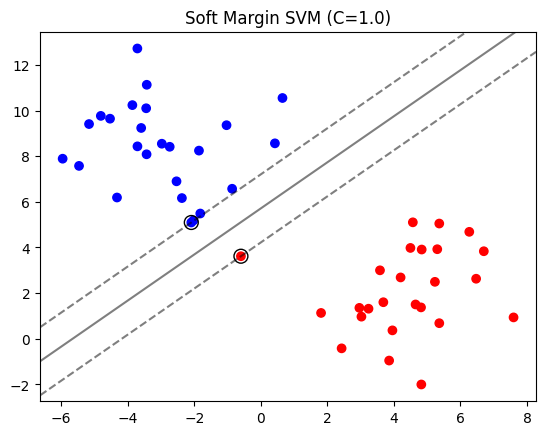

In [5]:
def plot_svm(model, X, y):
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap='bwr')
    
    ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    xx = np.linspace(xlim[0], xlim[1], 30)
    yy = np.linspace(ylim[0], ylim[1], 30)
    YY, XX = np.meshgrid(yy, xx)
    xy = np.vstack([XX.ravel(), YY.ravel()]).T
    Z = model.decision_function(xy).reshape(XX.shape)

    ax.contour(XX, YY, Z, colors='k', levels=[-1, 0, 1],
               alpha=0.5, linestyles=['--', '-', '--'])

    ax.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1],
               s=100, linewidth=1, facecolors='none', edgecolors='k')
    plt.title("Soft Margin SVM (C=1.0)")
    plt.show()

plot_svm(model, X, y)